## Importing Data

In [1]:
#Importing Data
import pandas as pd
df=pd.read_csv('./Mall Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.shape

(200, 5)

In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


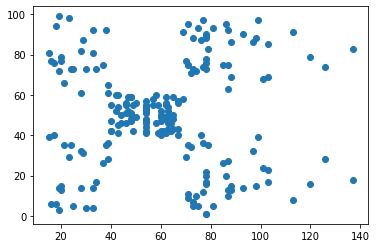

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.show()

## Fitting on KMeans Model

In [5]:
# The values to fitted
x=df[['Annual Income (k$)','Spending Score (1-100)']].values

In [6]:
# Running a Model with 5 clusters
from sklearn.cluster import KMeans
model=KMeans(n_clusters=5, random_state=0)

In [7]:
model.fit(x)

KMeans(n_clusters=5, random_state=0)

In [8]:
y=model.predict(x)
y

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

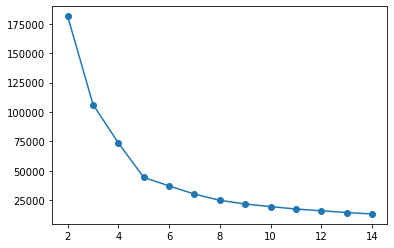

In [9]:
# Finding the optimum no. of Clusters using Elbow Method
k=range(2,15)
sse=[]
for i in k:
    model_demo=KMeans(n_clusters=i,random_state=0).fit(x)
    sse.append(model_demo.inertia_)
plt.scatter(k,sse)
plt.plot(k,sse)

## Optimum no of clusters =5

In [10]:
# Running a Model with 5 clusters
from sklearn.cluster import KMeans
model=KMeans(n_clusters=5, random_state=0).fit(x)

In [11]:
y=model.predict(x)

## Visualizing the Clustering

In [12]:
# Finding the no. of data points in each cluster
import numpy as np
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4]), array([81, 22, 39, 23, 35], dtype=int64))

In [13]:
# Values of Cluster 0 for Annual Income
x[y==0,0]

array([39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46,
       47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60,
       60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64,
       64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 71, 72, 76], dtype=int64)

In [14]:
# Values of Cluster 1 for Spending Score
x[y==1,1]

array([81, 77, 76, 94, 72, 99, 77, 79, 66, 98, 73, 73, 82, 61, 87, 73, 92,
       81, 73, 75, 92, 65], dtype=int64)

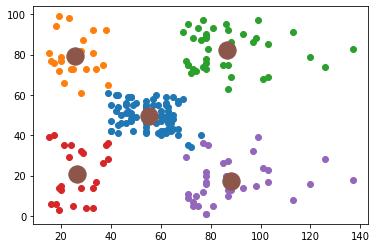

In [15]:
# Visualizing in Scatter Plot
for i in range(5):
    plt.scatter(x[y==i,0],x[y==i,1])

# Getting the Cluster Centers on the scatter plot
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=300)